<a href="https://colab.research.google.com/github/Brunopais/analise_python/blob/main/C%C3%B3pia_de_analise_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importar o arquivo bovespa
from google.colab import files
uploaded = files.upload()

Saving all_bovespa.csv to all_bovespa.csv


In [ ]:
df = pd.read_csv('all_bovespa.csv', delimiter=',')

In [ ]:
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negociado,volume_negocio
0,2023-01-02,NEOE3,NEOENERGIA,15.40,15.40,14.98,15.03,325000.0,4.902151e+08
1,2023-01-02,NEXP3,NEXPE,0.31,0.31,0.29,0.30,197700.0,5.898000e+06
2,2023-01-02,NGRD3,NEOGRID,1.48,1.50,1.43,1.45,589900.0,8.615090e+07
3,2023-01-02,NINJ3,GETNINJAS,2.70,2.79,2.69,2.71,76000.0,2.079260e+07
4,2023-01-02,NORD3,NORDON MET,8.48,9.00,8.48,8.50,2700.0,2.314300e+06
...,...,...,...,...,...,...,...,...,...
87478,2023-12-28,MELK3,MELNICK,4.72,4.80,4.64,4.80,163900.0,7.777590e+07
87479,2023-12-28,MGEL4,MANGELS INDL,13.30,13.30,13.30,13.30,800.0,1.064000e+06
87480,2023-12-28,FLRY3,FLEURY,18.46,18.50,17.98,18.04,8182700.0,1.478480e+10
87481,2023-12-28,FRAS3,FRAS-LE,16.87,17.00,16.70,17.00,363200.0,6.125260e+08


In [ ]:
#filtrar açoes
df_itau = df[df['sigla_acao'] == 'ITUB4']
df_petr = df[df['sigla_acao'] == 'PETR4']
df_bra= df[df['sigla_acao'] == 'BBDC4']
df_sinq= df[df['sigla_acao'] == 'SQIA3']

In [ ]:
#ajustar as datas
df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'],format='%Y-%m-%d')
df_itau = df_itau.set_index('data_pregao')

df_petr['data_pregao'] = pd.to_datetime(df_petr['data_pregao'],format='%Y-%m-%d')
df_petr = df_petr.set_index('data_pregao')

df_bra['data_pregao'] = pd.to_datetime(df_bra['data_pregao'],format='%Y-%m-%d')
df_bra = df_bra.set_index('data_pregao')

df_sinq['data_pregao'] = pd.to_datetime(df_sinq['data_pregao'],format='%Y-%m-%d')
df_sinq = df_sinq.set_index('data_pregao')

<ipython-input-7-b070659bbad8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'],format='%Y-%m-%d')
<ipython-input-7-b070659bbad8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petr['data_pregao'] = pd.to_datetime(df_petr['data_pregao'],format='%Y-%m-%d')
<ipython-input-7-b070659bbad8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

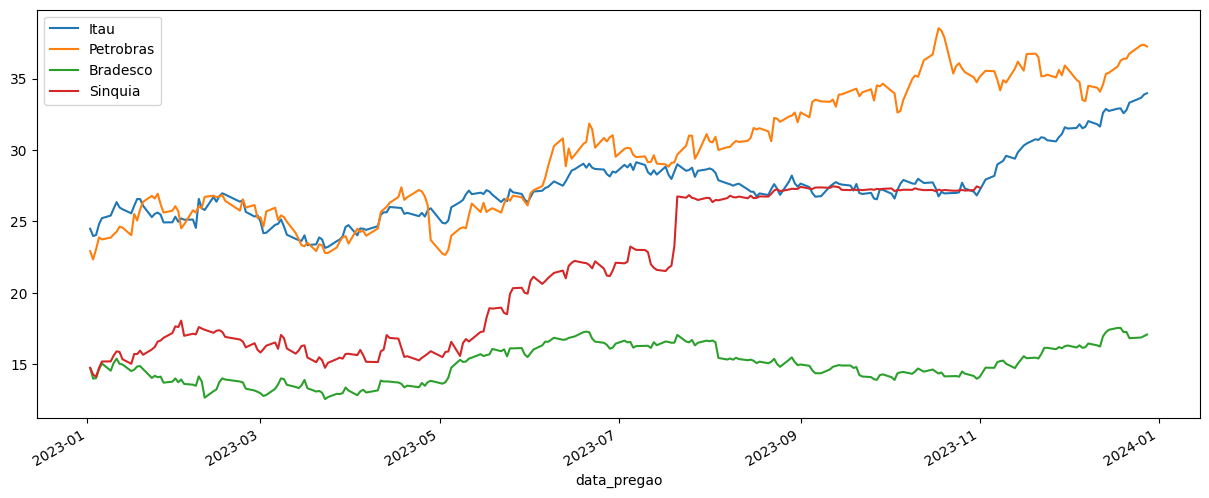

In [ ]:
#grafico de tendencia
df_itau['preco_fechamento'].plot(legend=True, label='Itau', figsize=(15,6))
df_petr['preco_fechamento'].plot(legend=True, label='Petrobras', figsize=(15,6))
df_bra['preco_fechamento'].plot(legend=True, label='Bradesco', figsize=(15,6))
df_sinq['preco_fechamento'].plot(legend=True, label='Sinquia', figsize=(15,6))
plt.show()

In [ ]:
#media movel
df_itau['mm7'] = df_itau['preco_fechamento'].rolling(7).mean()
df_petr['mm7'] = df_petr['preco_fechamento'].rolling(7).mean()
df_bra['mm7'] = df_bra['preco_fechamento'].rolling(7).mean()
df_sinq['mm7'] = df_sinq['preco_fechamento'].rolling(7).mean()

<Axes: xlabel='data_pregao'>

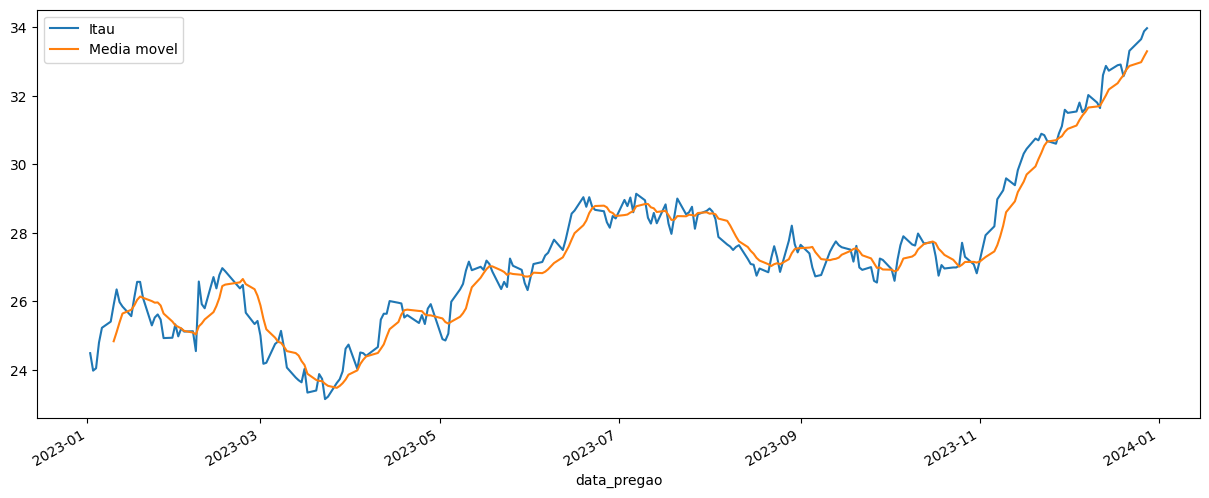

In [ ]:
#grafico de tendencia e media moveis
df_itau['preco_fechamento'].plot(legend=True, label='Itau', figsize=(15,6))
df_itau['mm7'].plot(legend=True, label='Media movel', figsize=(15,6))

In [ ]:
#mm de 15 , 30 , 60 dias
dias = [15, 30, 60]
for dia in dias:
  df_itau[f'mm{dia}'] = df_itau['preco_fechamento'].rolling(dia).mean()
  df_petr[f'mm{dia}'] = df_petr['preco_fechamento'].rolling(dia).mean()
  df_bra[f'mm{dia}'] = df_bra['preco_fechamento'].rolling(dia).mean()
  df_sinq[f'mm{dia}'] = df_sinq['preco_fechamento'].rolling(dia).mean()

In [ ]:
df_itau

,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negociado,volume_negocio,mm7,mm15,mm30,mm60
data_pregao,,,,,,,,,,,,
2023-01-02,ITUB4,ITAUUNIBANCO,24.43,24.53,24.04,24.49,23340700.0,5.664208e+10,NaN,NaN,NaN,NaN
2023-01-03,ITUB4,ITAUUNIBANCO,24.49,24.65,23.83,23.98,29873800.0,7.189867e+10,NaN,NaN,NaN,NaN
2023-01-04,ITUB4,ITAUUNIBANCO,24.06,24.52,23.88,24.05,29881500.0,7.192848e+10,NaN,NaN,NaN,NaN
2023-01-05,ITUB4,ITAUUNIBANCO,24.10,24.91,24.02,24.80,36322800.0,8.947754e+10,NaN,NaN,NaN,NaN
2023-01-06,ITUB4,ITAUUNIBANCO,24.93,25.31,24.80,25.23,37628200.0,9.429226e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,ITUB4,ITAUUNIBANCO,32.75,32.87,32.55,32.79,21813000.0,7.126065e+10,32.765714,32.186667,31.322667,29.361333
2023-12-22,ITUB4,ITAUUNIBANCO,32.82,33.54,32.80,33.31,32650500.0,1.085363e+11,32.867143,32.307333,31.458333,29.473167
2023-12-26,ITUB4,ITAUUNIBANCO,33.37,33.78,33.23,33.65,23135400.0,7.769789e+10,32.978571,32.448000,31.593667,29.591500


<Axes: xlabel='data_pregao'>

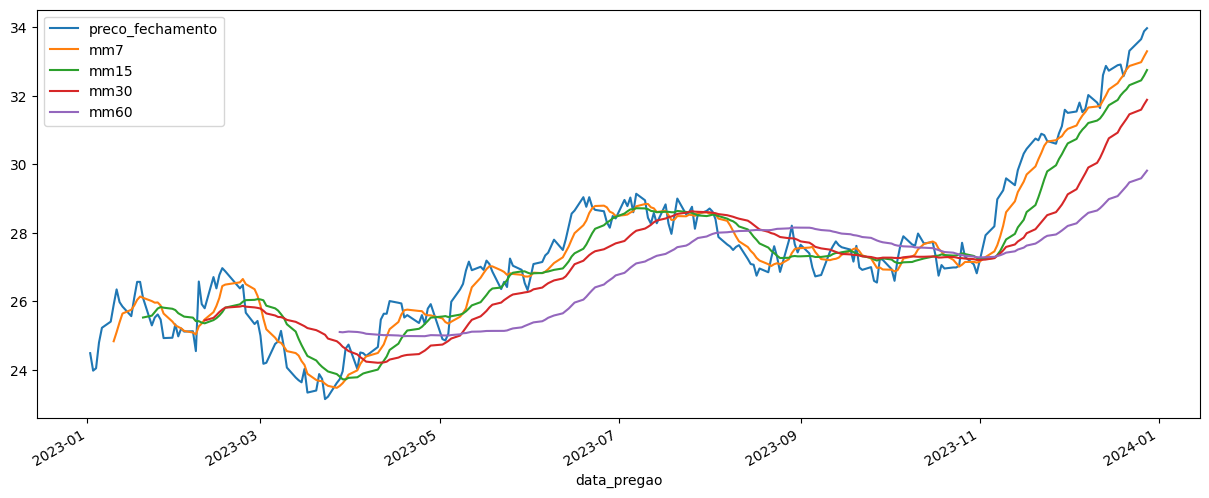

In [ ]:
#grafico de tendencias e medias moveis
df_itau[['preco_fechamento','mm7','mm15','mm30','mm60']].plot(legend=True, label='Itau', figsize=(15,6))
#

In [ ]:
#calculo do retorno diario
df_itau['retorno_diario'] = df_itau['preco_fechamento'].pct_change()
df_petr['retorno_diario'] = df_petr['preco_fechamento'].pct_change()
df_bra['retorno_diario'] = df_bra['preco_fechamento'].pct_change()
df_sinq['retorno_diario'] = df_sinq['preco_fechamento'].pct_change()

<Axes: xlabel='data_pregao'>

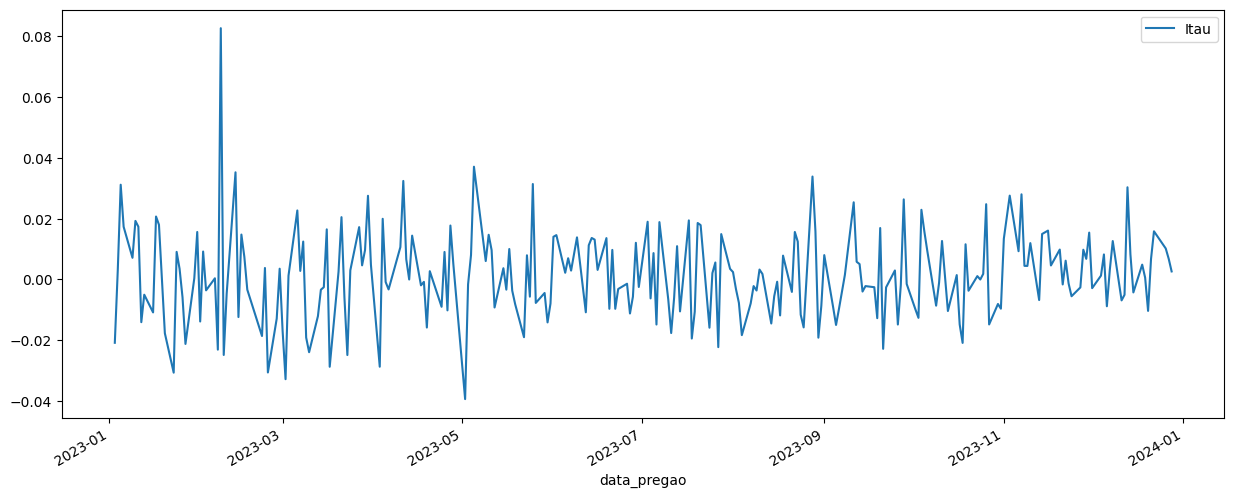

In [ ]:
#grafico do retorno do dia
df_itau['retorno_diario'].plot(legend=True, label='Itau', figsize=(15,6))


<ipython-input-37-fb70694f2bc4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_itau['retorno_diario'], ax=axes[0,0])
<ipython-input-37-fb70694f2bc4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_petr['retorno_diario'], ax=axes[0,1])
<ipython-input-37-fb70694f2bc4>:7: UserWarning: 

`d

<Axes: xlabel='retorno_diario', ylabel='Density'>

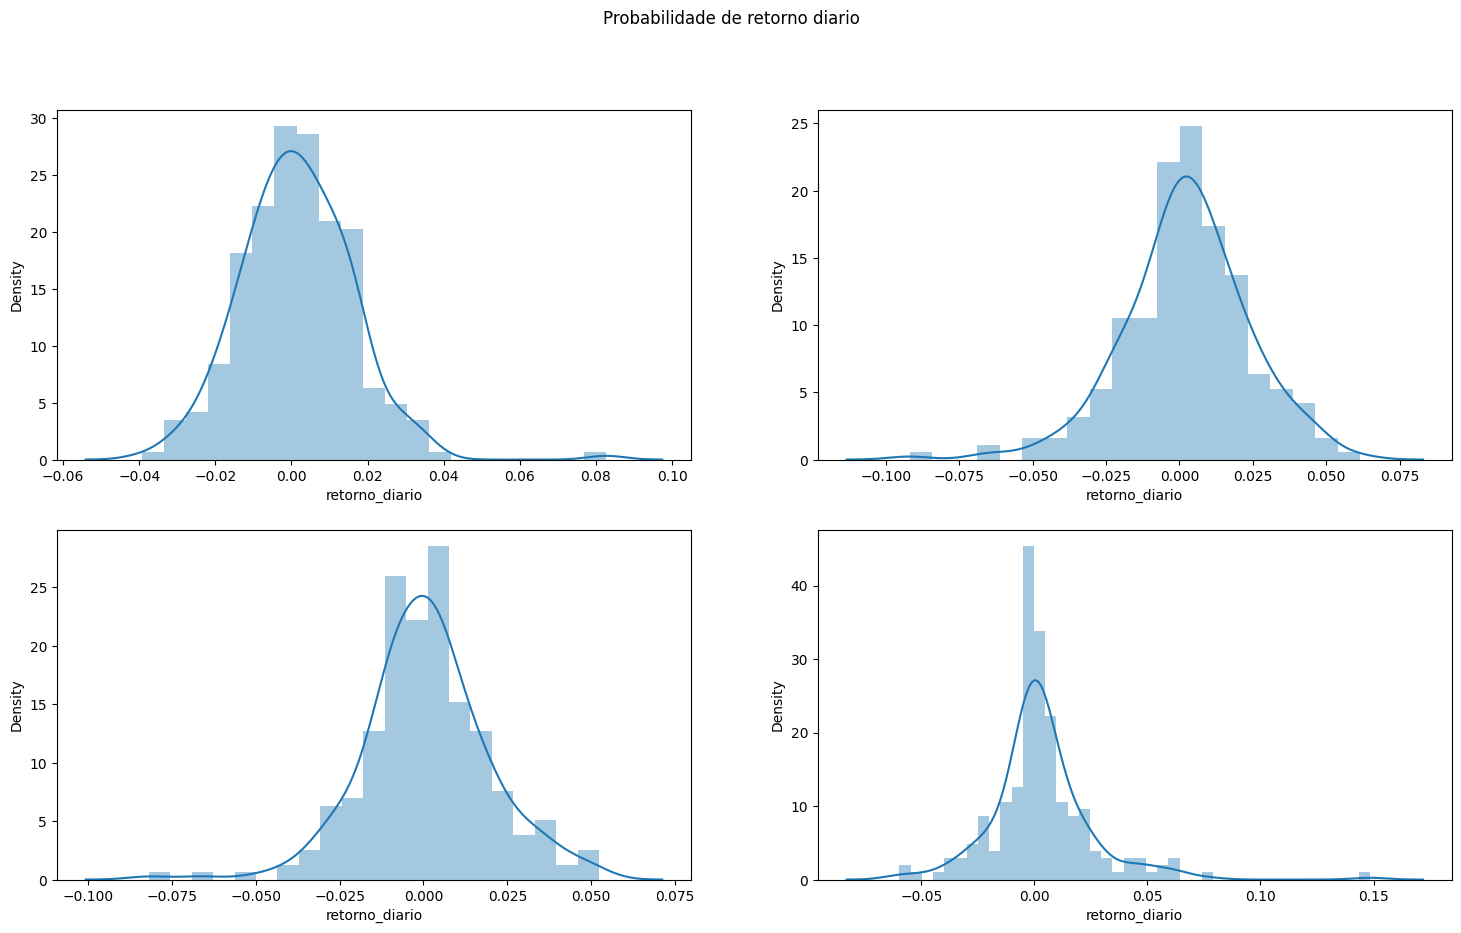

In [ ]:
fig , axes = plt.subplots( 2, 2 , figsize= (18,10))

fig.suptitle('Probabilidade de retorno diario')

sns.distplot(df_itau['retorno_diario'], ax=axes[0,0])
sns.distplot(df_petr['retorno_diario'], ax=axes[0,1])
sns.distplot(df_bra['retorno_diario'], ax=axes[1,0])
sns.distplot(df_sinq['retorno_diario'], ax=axes[1,1])

In [ ]:
#analise açoes correlativas
df_all = pd.DataFrame({'Itau': df_itau['preco_fechamento'],
                       'Petrobras': df_petr['preco_fechamento'],
                       'Bradesco' : df_bra['preco_fechamento'],
                       'Sinqia' : df_sinq['preco_fechamento'],})
corr = df_all.corr()
corr

,Itau,Petrobras,Bradesco,Sinqia
Itau,1.000000,0.764511,0.799345,0.713156
Petrobras,0.764511,1.000000,0.450432,0.924720
Bradesco,0.799345,0.450432,1.000000,0.421744
Sinqia,0.713156,0.924720,0.421744,1.000000


<Axes: >

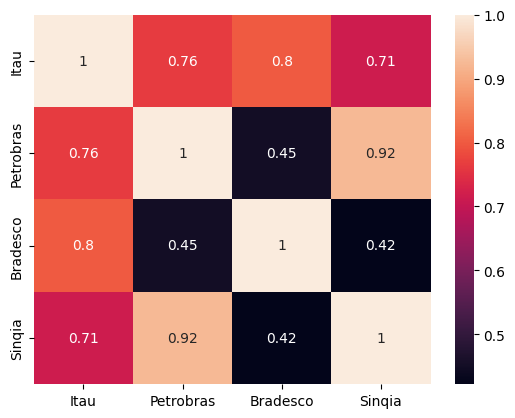

In [ ]:
#heatmap mapa de calor
sns.heatmap(corr, annot=True)

In [ ]:
#risco x retorno
retorno_itau = df_itau.retorno_diario.dropna().mean()
risco_itau = df_itau.retorno_diario.dropna().std()

retorno_petr = df_petr.retorno_diario.dropna().mean()
risco_petr = df_petr.retorno_diario.dropna().std()

retorno_bra = df_bra.retorno_diario.dropna().mean()
risco_bra = df_bra.retorno_diario.dropna().std()

retorno_sinq = df_sinq.retorno_diario.dropna().mean()
risco_sinq = df_sinq.retorno_diario.dropna().std()

In [ ]:
print(retorno_itau, risco_itau)
print(retorno_petr, risco_petr)
print(retorno_bra, risco_bra)
print(retorno_sinq, risco_sinq)

0.0014332469080413424 0.014752166183947377
0.002198243731223633 0.021492494764965283
0.0007737194734121203 0.01884379759302898
0.0032119005280668573 0.022662757364640032


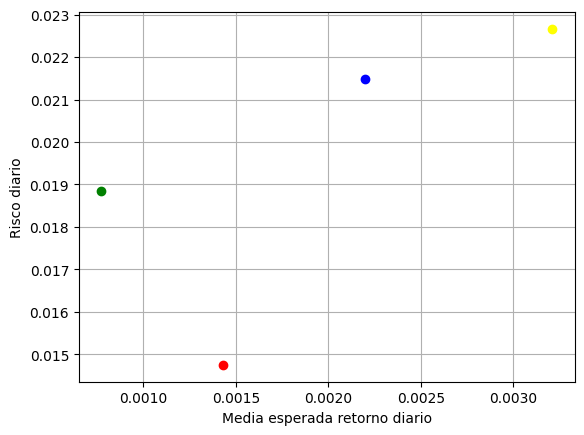

In [ ]:
#plot grafico risco retorno

plt.grid()
plt.xlabel('Media esperada retorno diario')
plt.ylabel('Risco diario')
plt.scatter(retorno_itau, risco_itau, color='red')
plt.scatter(retorno_petr, risco_petr, color='blue')
plt.scatter(retorno_bra, risco_bra, color='green')
plt.scatter(retorno_sinq, risco_sinq, color='yellow')